## Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import numpy as np
import warnings

## Functions

In [2]:
def plot_sine_wave(freq, amp, start, stop, ax, xoffset, yoffset, color='tab:blue'):
    # Generate time values
    t = np.linspace(start, stop, 1000)
    
    # Generate the sine wave
    sine_wave = amp * np.sin(2 * np.pi * freq * t + xoffset) + yoffset
    ax.plot(t, sine_wave, color=color, linewidth=3)

## Define color palette

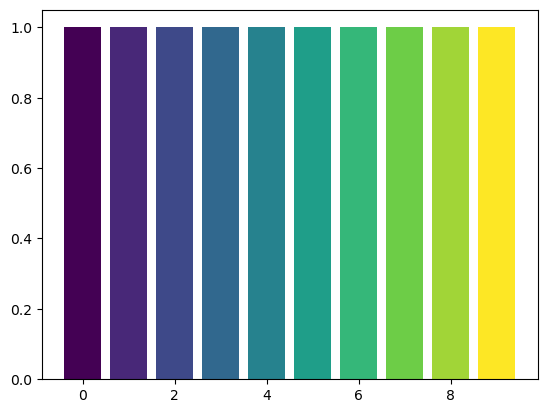

In [3]:
viridis_discrete = [
    '#440154',
    '#482878',
    '#3E4989',
    '#31688E',
    '#26828E',
    '#1F9E89',
    '#35B779',
    '#6DCD47',
    '#A1D537',
    '#FDE725'
]

# Plotting a bar chart using the viridis colors in hex format
values = range(10)
plt.bar(values, [1]*10, color=viridis_discrete)
plt.show()

## Make conceptual plot

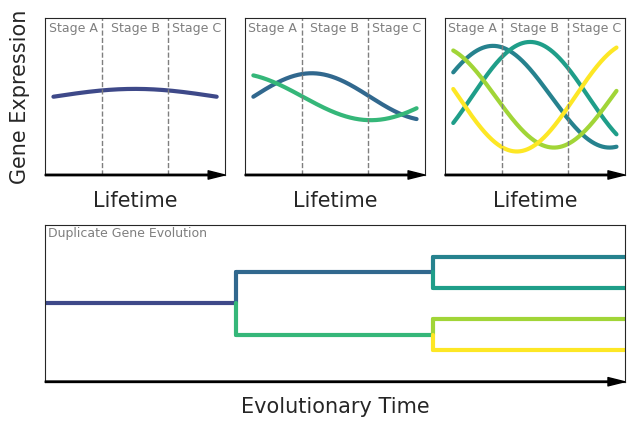

In [17]:
#ignore warnings
warnings.filterwarnings("ignore")

#set style
sns.set_style('white')


#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'cmr10' 

#initialize figure
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6.5)

#add subplots
ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0), colspan=1)
ax2 = plt.subplot2grid(shape=(3, 3), loc=(0, 1), colspan=1)
ax3 = plt.subplot2grid(shape=(3, 3), loc=(0, 2), colspan=1)
ax4 = plt.subplot2grid(shape=(3, 3), loc=(1, 0), colspan=3, rowspan=1)

#ax1.axis('off')
#ax2.axis('off')
#ax3.axis('off')
#ax4.axis('off')


#make tree
#trunck
ax4.axhline(y=0.5, xmax=0.33, linewidth=3, color=viridis_discrete[2])
#first branches
ax4.axvline(x=0.33, ymax=0.7, ymin=0.5, linewidth=3, color=viridis_discrete[3])
ax4.axvline(x=0.33, ymax=0.5, ymin=0.3, linewidth=3, color=viridis_discrete[6])
#second branches
ax4.axhline(y=0.7, xmax=0.67, xmin=0.33, linewidth=3, color=viridis_discrete[3])
ax4.axhline(y=0.3, xmax=0.67, xmin=0.33, linewidth=3, color=viridis_discrete[6])
#third branches
ax4.axvline(x=0.67, ymin=0.7, ymax=0.8, linewidth=3, color=viridis_discrete[4])
ax4.axvline(x=0.67, ymin=0.7, ymax=0.6, linewidth=3, color=viridis_discrete[5])
ax4.axvline(x=0.67, ymin=0.3, ymax=0.4, linewidth=3, color=viridis_discrete[8])
ax4.axvline(x=0.67, ymin=0.2, ymax=0.3, linewidth=3, color=viridis_discrete[9])
#leaves
ax4.axhline(y=0.8, xmin=0.67, linewidth=3, color=viridis_discrete[4])
ax4.axhline(y=0.6, xmin=0.67, linewidth=3, color=viridis_discrete[5])
ax4.axhline(y=0.4, xmin=0.67, linewidth=3, color=viridis_discrete[8])
ax4.axhline(y=0.2, xmin=0.67, linewidth=3, color=viridis_discrete[9])
ax4.set_xlabel('Evolutionary Time', fontsize=15)

ax1.set_ylabel('Gene Expression', fontsize=15)
ax1.set_xlabel('Lifetime', fontsize=15)
#ax2.set_ylabel('Expression', fontsize=15)
ax2.set_xlabel('Lifetime', fontsize=15)
#ax3.set_ylabel('Expression', fontsize=15)
ax3.set_xlabel('Lifetime', fontsize=15)

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])

#add initial expression pattern 
plot_sine_wave(freq=0.5, amp=0.1, start=0, stop=1, ax=ax1, xoffset=0, yoffset=0, 
               color=viridis_discrete[2])
ax1.set_ylim(-1,1)

#add expression patterns after initial duplication
plot_sine_wave(freq=0.7, amp=0.3, start=0, stop=1, ax=ax2, xoffset=0, yoffset=0,
              color=viridis_discrete[3])
plot_sine_wave(freq=0.6, amp=0.3, start=0, stop=1, ax=ax2, xoffset=2, yoffset=0,
              color=viridis_discrete[6])
ax2.set_ylim(-1,1)

#add expression patterns after another duplication
plot_sine_wave(freq=0.7, amp=0.65, start=0, stop=1, ax=ax3, xoffset=0.5, yoffset=0,
              color=viridis_discrete[4])
plot_sine_wave(freq=0.7, amp=0.7, start=0, stop=1, ax=ax3, xoffset=-0.5, yoffset=0,
              color=viridis_discrete[5])
plot_sine_wave(freq=0.7, amp=0.65, start=0, stop=1, ax=ax3, xoffset=2, yoffset=0,
              color=viridis_discrete[8])
plot_sine_wave(freq=0.7, amp=0.7, start=0, stop=1, ax=ax3, xoffset=3, yoffset=0,
              color=viridis_discrete[9])

ax3.set_ylim(-1,1)
#add arrows
ax1.annotate('', xy=(1.05, -1), xytext=(-0.05, -1),
             arrowprops=dict(color='black', width=1, headwidth=6))
ax2.annotate('', xy=(1.05, -1), xytext=(-0.05, -1),
             arrowprops=dict(color='black', width=1, headwidth=6))
ax3.annotate('', xy=(1.05, -1), xytext=(-0.05, -1),
             arrowprops=dict(color='black', width=1, headwidth=6))

ax4.annotate('', xy=(1, 0), xytext=(0, 0),
             arrowprops=dict(color='black', width=1, headwidth=6))

#add stages
ax1.axvline(x=0.3, linewidth=1, color='tab:gray', linestyle='--')
ax1.axvline(x=0.7, linewidth=1, color='tab:gray', linestyle='--')
ax1.text(x=-0.03, y=0.83, s="Stage A", fontsize=9, color='tab:gray')
ax1.text(x=0.35, y=0.83, s="Stage B", fontsize=9, color='tab:gray')
ax1.text(x=0.725, y=0.83, s="Stage C", fontsize=9, color='tab:gray')

ax2.axvline(x=0.3, linewidth=1, color='tab:gray', linestyle='--')
ax2.axvline(x=0.7, linewidth=1, color='tab:gray', linestyle='--')
ax2.text(x=-0.03, y=0.83, s="Stage A", fontsize=9, color='tab:gray')
ax2.text(x=0.35, y=0.83, s="Stage B", fontsize=9, color='tab:gray')
ax2.text(x=0.725, y=0.83, s="Stage C", fontsize=9, color='tab:gray')

ax3.axvline(x=0.3, linewidth=1, color='tab:gray', linestyle='--')
ax3.axvline(x=0.7, linewidth=1, color='tab:gray', linestyle='--')
ax3.text(x=-0.03, y=0.83, s="Stage A", fontsize=9, color='tab:gray')
ax3.text(x=0.35, y=0.83, s="Stage B", fontsize=9, color='tab:gray')
ax3.text(x=0.725, y=0.83, s="Stage C", fontsize=9, color='tab:gray')

ax4.text(x=0.005, y=0.925, s="Duplicate Gene Evolution", fontsize=9, color='tab:gray')

plt.tight_layout()
plt.savefig('/home/gabe/Desktop/mtstp/figures/conceptual_figure.pdf', bbox_inches='tight')